In [1]:
import Classifier.classifiermodel as clf
import Classifier.Dataloader
import tensorflow as tf
import os

In [2]:
base_dir = '../Datasets/dogs-vs-cats/'

model, summary = clf.model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 138, 138, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 138, 138, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 69, 69, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 69, 69, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 67, 67, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 67, 67, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 64)        0

In [4]:
# Added Learning rate schedular.

def schedular(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.2)


train, validation, steps_per_epoc, validation_steps = Classifier.Dataloader.load_data(train_dir=os.path.join(base_dir, 'train'),
                                                                                      classmode='categorical',
                                                                                      batch_size=10
                                                                                      )


Found 17500 validated image filenames belonging to 2 classes.
Found 7500 validated image filenames belonging to 2 classes.


In [6]:
lrSchedular = tf.keras.callbacks.LearningRateScheduler(schedular)
earlyStoping = tf.keras.callbacks.EarlyStopping(patience=10)


history = model.fit(train,
                    epochs=50,
                    validation_data=validation,
                    validation_steps=validation_steps,  # Match steps with your batch for avoiding data generator error
                    steps_per_epoch=steps_per_epoc,
                    callbacks=[lrSchedular, earlyStoping]
                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1750 steps, validate for 750 steps
Epoch 1/50
1750/1750 [==============================] - 474s 271ms/step - loss: 1.1897 - accuracy: 0.5635 - val_loss: 1.0139 - val_accuracy: 0.5297
Epoch 2/50
1750/1750 [==============================] - 170s 97ms/step - loss: 0.6598 - accuracy: 0.6171 - val_loss: 0.7194 - val_accuracy: 0.6341
Epoch 3/50
1750/1750 [==============================] - 173s 99ms/step - loss: 0.6490 - accuracy: 0.6358 - val_loss: 0.6119 - val_accuracy: 0.6417
Epoch 4/50
1750/1750 [==============================] - 177s 101ms/step - loss: 0.6343 - accuracy: 0.6559 - val_loss: 0.6121 - val_accuracy: 0.6648
Epoch 5/50
1750/1750 [==============================] - 176s 101ms/step - loss: 0.6232 - accuracy: 0.6643 - val_loss: 0.6075 - val_accuracy: 0.6908
Epoch 6/50
1750/1750 [==============================] - 177s 101ms/step - loss: 0.6239 - accuracy: 0.6614 - val_loss: 0.6540 - val_accuracy: 0.6912
Epoch 7/50
1750/175

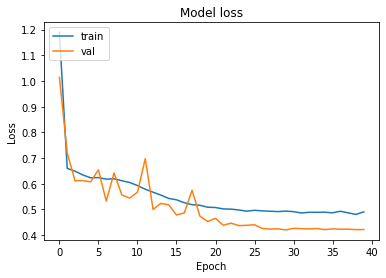

In [7]:
import matplotlib.pyplot as plt

# plot train and test loss.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()